In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [9]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/test.csv')

D_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_D_코드.csv', index_col = 0).T.to_dict()
H_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_H_코드.csv', index_col = 0).T.to_dict()
L_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_L_코드.csv', index_col = 0).T.to_dict()

In [10]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [11]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


###  d_s_match_yn과 d_l_match_yn은 같을까?

In [12]:
## d_l_match_yn의 True False의 개수는?
## d_s_match_yn의 True False의 개수는?
## h_l_match_yn의 True False의 개수는?
## h_s_match_yn의 True False의 개수는?

print('############################ d_l_match_yn #################################')
print('True :',len(train[train['d_l_match_yn'] == True]), 'False :', len(train[train['d_l_match_yn'] == False]) )

print('############################ d_s_match_yn #################################')
print('True :',len(train[train['d_s_match_yn'] == True]), 'False :', len(train[train['d_s_match_yn'] == False]) )

print('############################ h_l_match_yn #################################')
print('True :',len(train[train['h_l_match_yn'] == True]), 'False :', len(train[train['h_l_match_yn'] == False]) )

print('############################ h_s_match_yn #################################')
print('True :',len(train[train['h_s_match_yn'] == True]), 'False :', len(train[train['h_s_match_yn'] == False]) )

## 그러면 이 데이터를 어떻게 변경시켜줘야 할까?
## 거의 시작부터 많이 틀렸다? 그러면 아예 데이터를 사용하지 않는다면?? 더 높아지지 않을까??
## 잘못 기입된 데이터일까??
## 변경시키지 말고 그냥 데이터를 넣어주자.

############################ d_l_match_yn #################################
True : 315268 False : 186683
############################ d_s_match_yn #################################
True : 75257 False : 426694
############################ h_l_match_yn #################################
True : 399338 False : 102613
############################ h_s_match_yn #################################
True : 136629 False : 365322


In [13]:
# 관련 코드들을 한번에 모델 돌리기 위해서
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(train, D_code, H_code, L_code)
test_data = add_code(test, D_code, H_code, L_code)

print(train_data.shape)
print(test_data.shape)

(501951, 56)
(46404, 55)


## 속성 코드 이해하기 D, H, L

In [14]:
D_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_D_코드.csv')
H_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_H_코드.csv')
L_code = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/속성_L_코드.csv')

In [15]:
print('##################### D 코드 ################################')
print('D 대분류코드 개수 :',len(D_code['속성 D 대분류코드'].unique()))
print('D 중분류코드 개수 :',len(D_code['속성 D 중분류코드'].unique()))
print('D 소분류코드 개수 :',len(D_code['속성 D 소분류코드'].unique()))
print('D 세분류코드 개수 :',len(D_code['속성 D 세분류코드'].unique()))

print('##################### H 코드 ################################')
print('H 대분류코드 개수 :',len(H_code['속성 H 대분류코드'].unique()))
print('H 중분류코드 개수 :',len(H_code['속성 H 중분류코드'].unique()))

print('##################### L 코드 ################################')
print('L 대분류코드 개수 :',len(L_code['속성 L 대분류코드'].unique()))
print('L 중분류코드 개수 :',len(L_code['속성 L 중분류코드'].unique()))
print('L 소분류코드 개수 :',len(L_code['속성 L 소분류코드'].unique()))
print('L 세분류코드 개수 :',len(L_code['속성 L 세분류코드'].unique()))

##################### D 코드 ################################
D 대분류코드 개수 : 11
D 중분류코드 개수 : 36
D 소분류코드 개수 : 137
D 세분류코드 개수 : 451
##################### H 코드 ################################
H 대분류코드 개수 : 21
H 중분류코드 개수 : 256
##################### L 코드 ################################
L 대분류코드 개수 : 22
L 중분류코드 개수 : 99
L 소분류코드 개수 : 332
L 세분류코드 개수 : 828


### D 코드

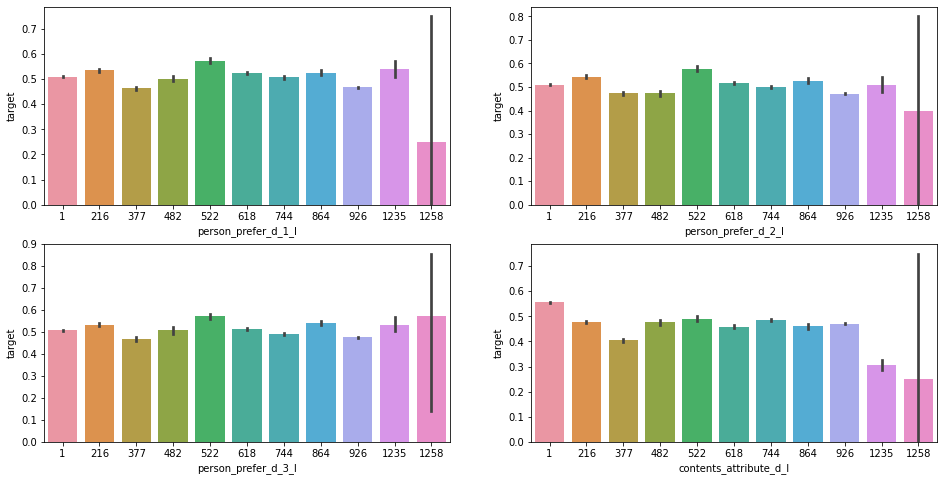

In [16]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (16,8))

sns.barplot(data = train_data, x = 'person_prefer_d_1_l', y = 'target', ax = ax[0,0])
sns.barplot(data = train_data, x = 'person_prefer_d_2_l', y = 'target',ax = ax[0,1])
sns.barplot(data = train_data, x = 'person_prefer_d_3_l',y = 'target', ax = ax[1,0])
sns.barplot(data = train_data, x = 'contents_attribute_d_l', y = 'target',ax = ax[1,1])

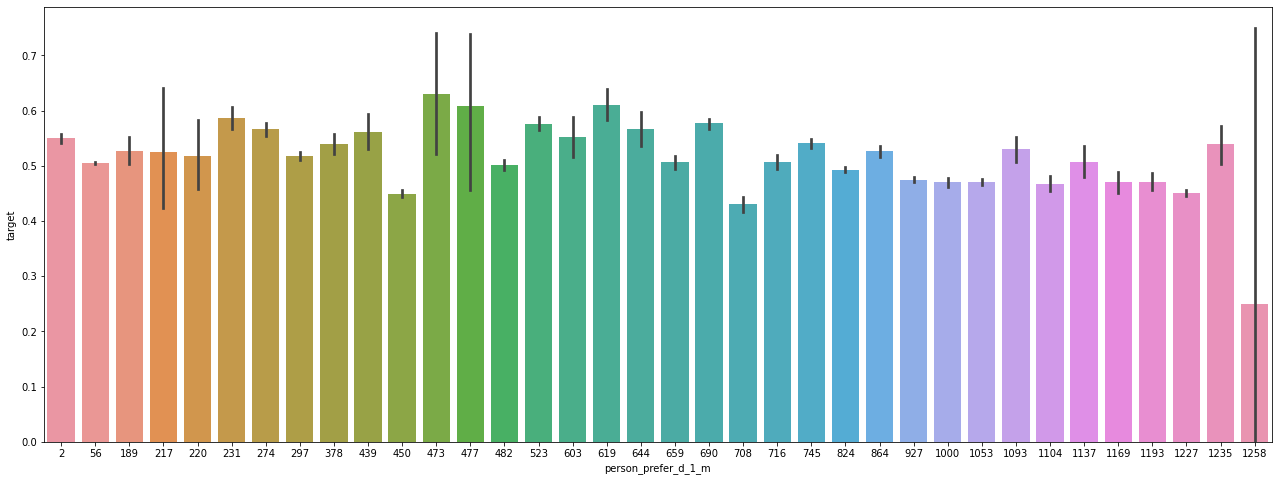

In [17]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'person_prefer_d_1_m', y = 'target')

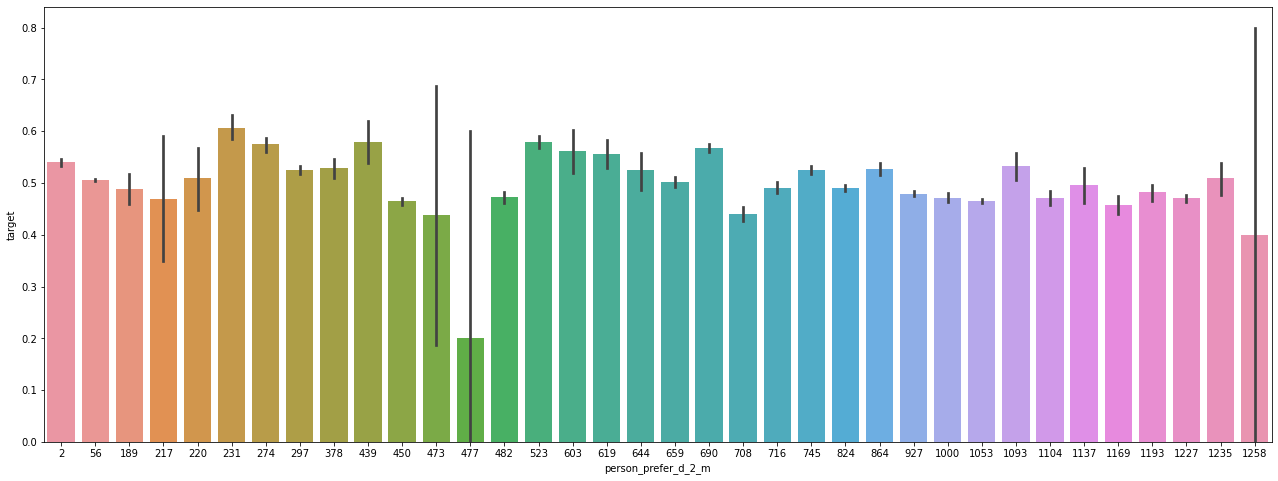

In [18]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'person_prefer_d_2_m', y = 'target')

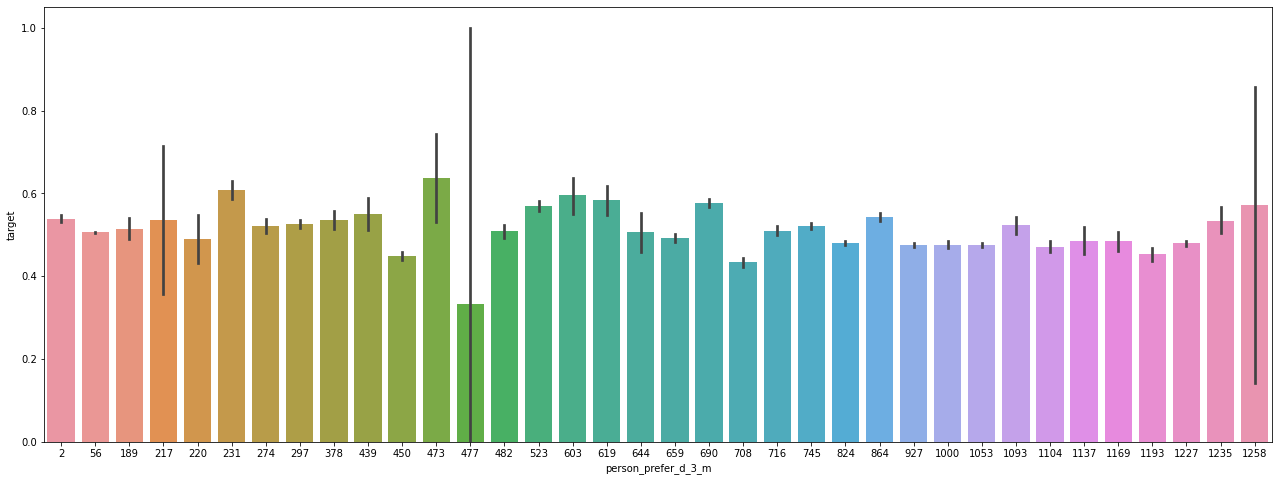

In [19]:
## person_prefer_d 대분류와 중분류 비교해보기
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'person_prefer_d_3_m', y = 'target')

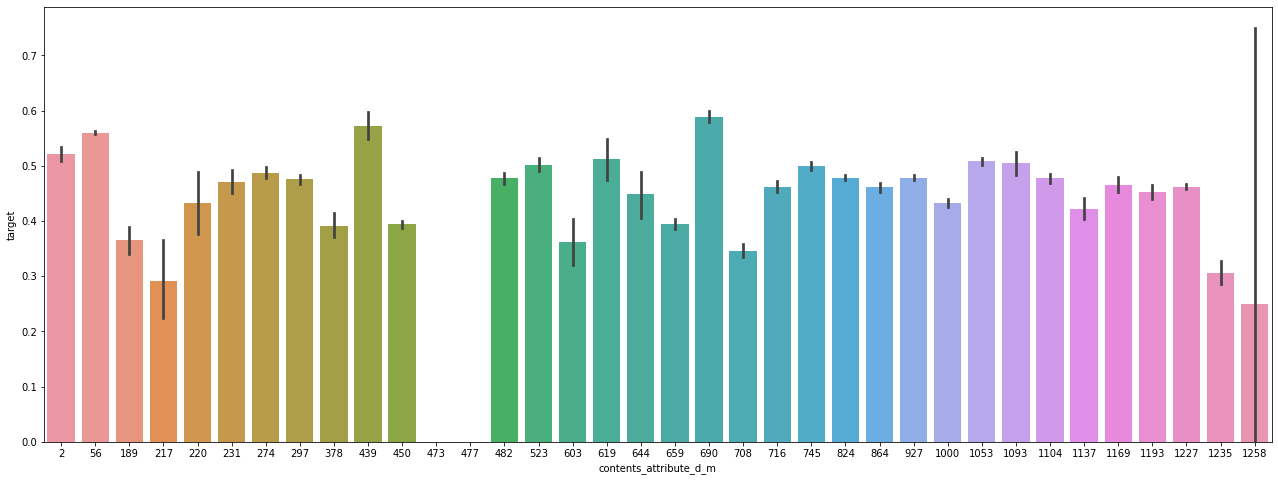

In [20]:
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'contents_attribute_d_m', y = 'target')

In [21]:
for i in ['person_prefer_d_1_l','person_prefer_d_2_l','person_prefer_d_3_l','contents_attribute_d_l']:
    
    print(f'##################### {i} #############################')
    for j in train_data[i].unique():
        
        print(f'##################### {j} #############################')
        print(train_data[train_data[i] == j][i[:-1] + 'm'].value_counts())

##################### person_prefer_d_1_l #############################
##################### 216 #############################
297    16673
274     6990
231     2254
220      249
217       78
Name: person_prefer_d_1_m, dtype: int64
##################### 1 #############################
56     190011
2       15914
189      1521
Name: person_prefer_d_1_m, dtype: int64
##################### 377 #############################
450    22240
378     2998
439      994
473       73
477       46
Name: person_prefer_d_1_m, dtype: int64
##################### 618 #############################
690    12148
659     8769
716     6012
708     5335
619     1138
644     1007
Name: person_prefer_d_1_m, dtype: int64
##################### 926 #############################
927     37305
1053    31260
1227    30041
1000    13481
1104     6115
1193     3696
1169     2708
1093     1881
1137     1188
Name: person_prefer_d_1_m, dtype: int64
##################### 744 #############################
824    35474
745  

### contents_open_dt

In [22]:
# contents_open_dt를 년, 월, 일, 시간으로 나누자.
def date_time(df, columns = 'contents_open_dt'):

    df[columns] = pd.to_datetime(df[columns])
    df['year'] = df[columns].dt.year
    df['month'] = df[columns].dt.month
    df['day'] = df[columns].dt.day
    df['hour'] = df[columns].dt.hour
    df['weekday'] = df[columns].apply(lambda x: x.weekday())
    df['weekend'] = df['weekday'].copy()
    df['weekday'] = df['weekday'].apply(lambda x:1 if x>4 else 0)
    df['date'] = df[columns].dt.date

    return df

train_data = date_time(train_data)
test_data = date_time(test_data)

In [23]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,year,month,day,hour,weekday,weekend,date
0,0,True,True,True,False,False,False,1,4,3,5,8,1,1,3,3,10,2,1,2,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016,2020,1,17,12,0,4,2020-01-17
1,1,False,False,False,True,True,False,1,3,4,1,4,1,1,1,3,5,1,1,2,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016,2020,6,18,17,0,3,2020-06-18
2,2,False,False,False,True,False,False,2,0,3,5,3,1,1,3,1,10,2,1,1,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016,2020,7,8,20,0,2,2020-07-08
3,3,False,False,False,True,False,False,2,0,2,5,3,1,1,1,3,5,1,1,2,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016,2020,1,13,18,0,0,2020-01-13
4,4,True,True,True,False,False,False,1,3,4,5,4,1,1,1,1,10,2,1,2,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016,2020,3,9,20,0,0,2020-03-09


Text(0.5, 1.0, 'Countplot of year by test')

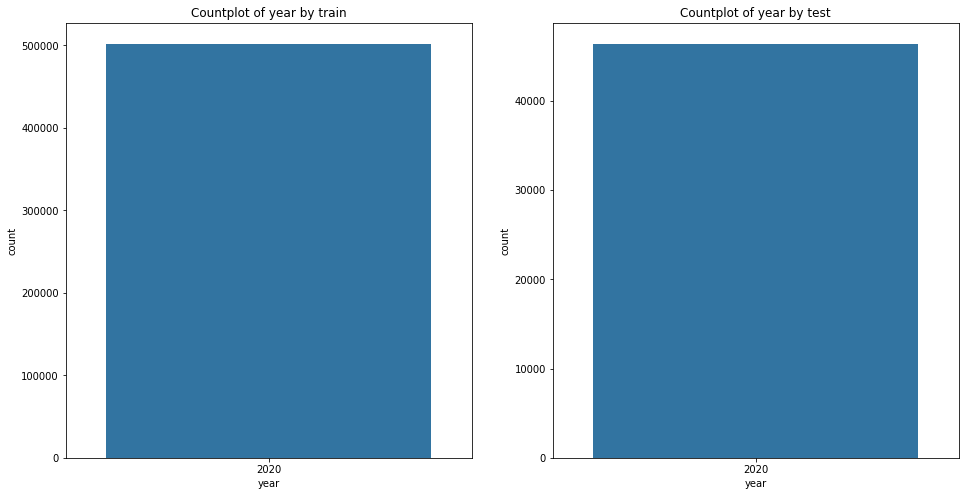

In [24]:
## year 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['year'], ax = ax[0])
sns.countplot(test_data['year'], ax = ax[1])

ax[0].set_title('Countplot of year by train')
ax[1].set_title('Countplot of year by test')

Text(0.5, 1.0, 'Countplot of month by test')

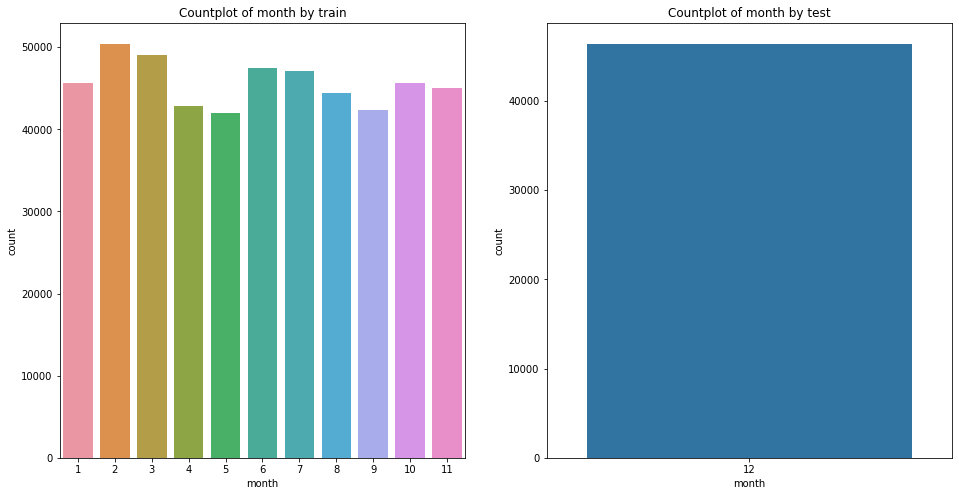

In [25]:
## month 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['month'], ax = ax[0])
sns.countplot(test_data['month'], ax = ax[1])

ax[0].set_title('Countplot of month by train')
ax[1].set_title('Countplot of month by test')

# train 데이터는 1월부터 11월까지지만 test데이터는 12월의 데이터만 가지고 있다.
# 더미화를 사용할 수 없을 것이라 판단된다.

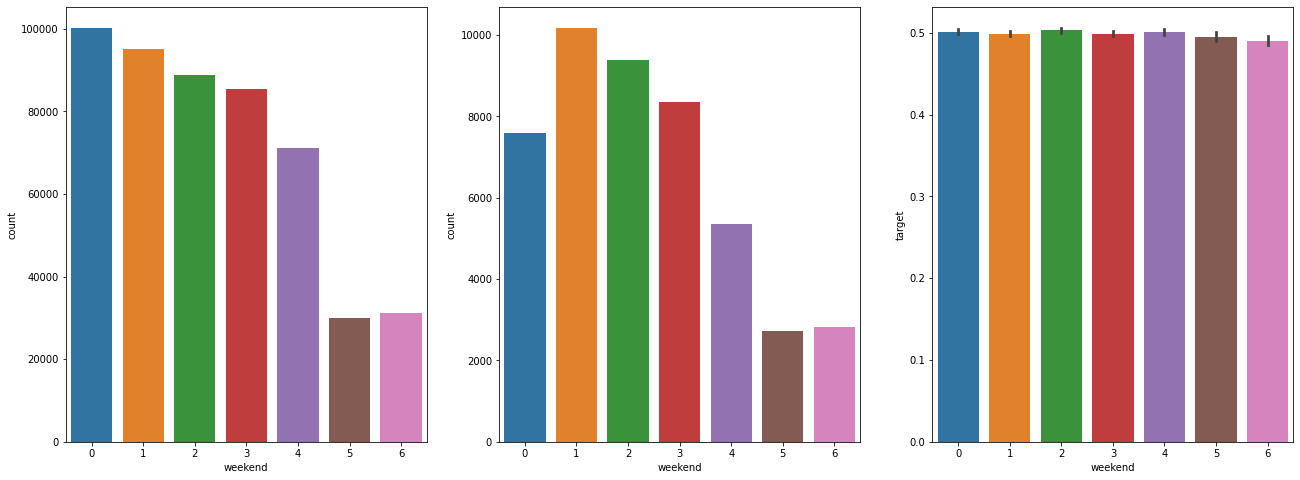

In [26]:
## weekend로 살펴보자.
fig, ax = plt.subplots(ncols = 3, figsize = (22,8))
sns.countplot(train_data['weekend'], ax = ax[0])
sns.countplot(test_data['weekend'], ax= ax[1])
sns.barplot(data = train_data, x = 'weekend', y = 'target', ax = ax[2])

## 다른 부분이 여기서도 발견이 된다.~

Text(0.5, 1.0, 'Countplot of hour by test')

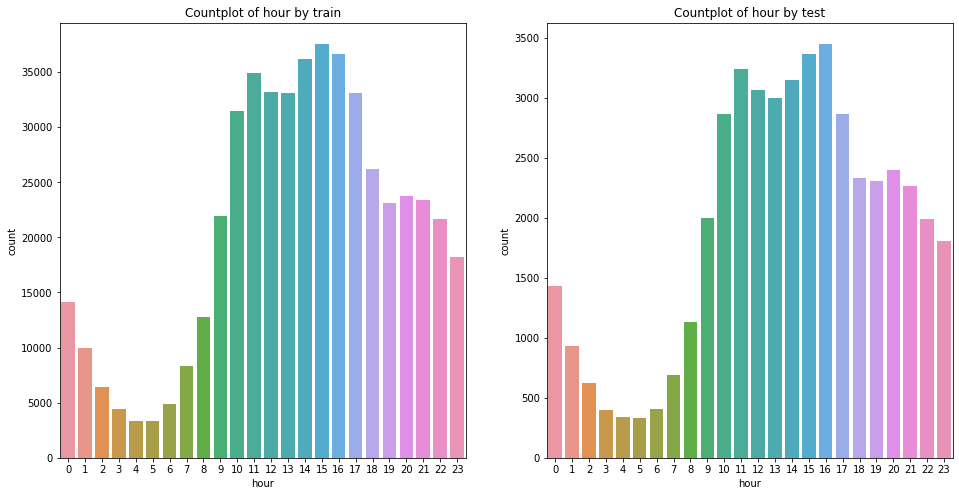

In [27]:
## hour 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))

sns.countplot(train_data['hour'], ax = ax[0])
sns.countplot(test_data['hour'], ax = ax[1])

ax[0].set_title('Countplot of hour by train')
ax[1].set_title('Countplot of hour by test')

## train과 test의 데이터가 비슷한 분포를 가지고 있다는 것을 알 수 있다.

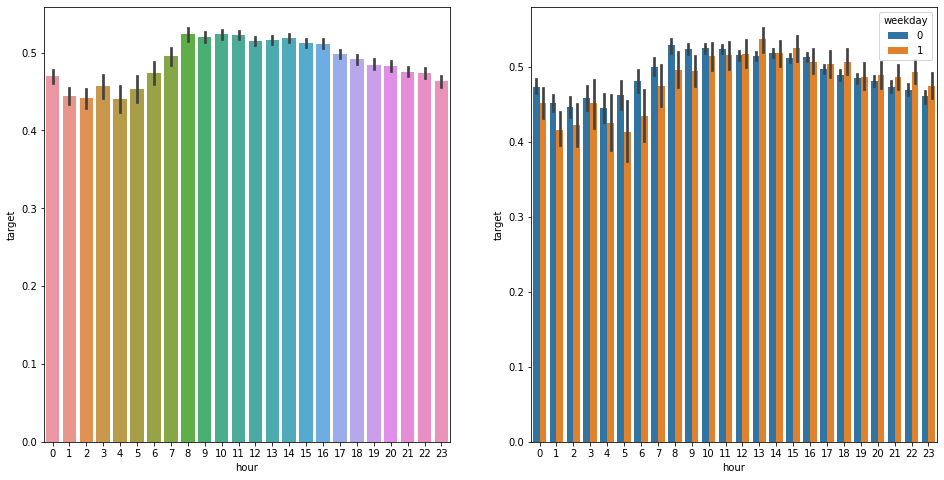

In [28]:
## train의 hour를 target값과 비교해 보자.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', ax = ax[0])
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekday', ax = ax[1])

# 재밌는 현상으로 12시 넘어가서는 평일보다 주말에 더 많은 사람이 이용한다.

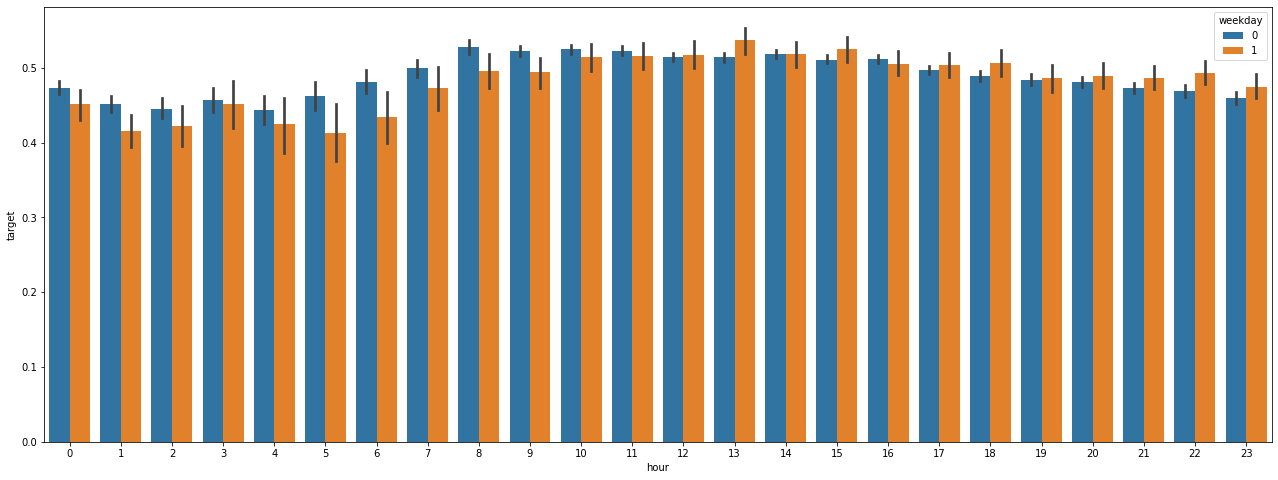

In [29]:
## 더 자세히 살펴보도록 하자.
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekday')

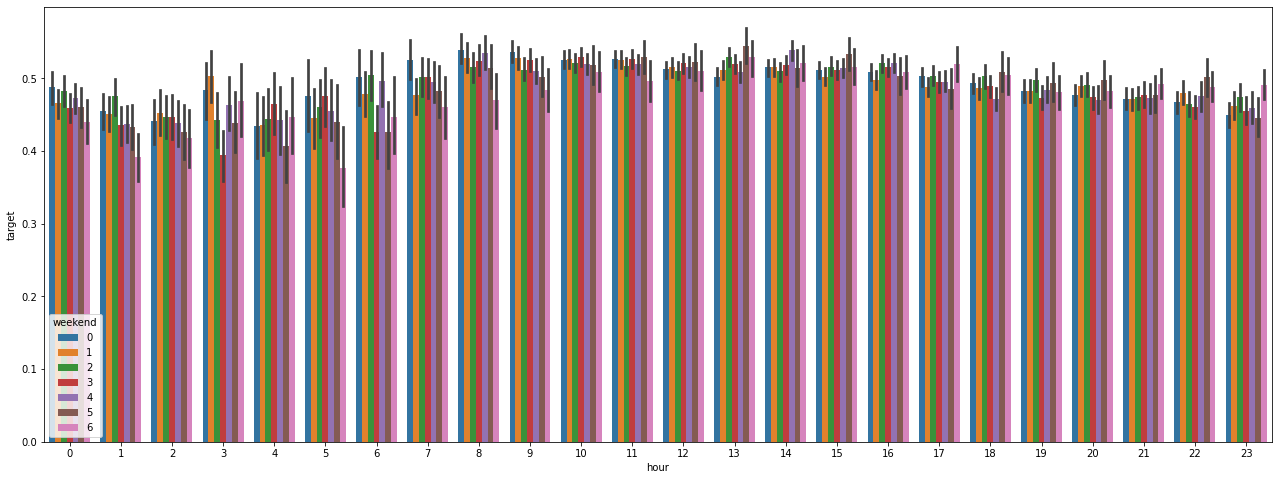

In [30]:
# 시간을 요일별로 확인해 보자.
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'hour', y = 'target', hue = 'weekend')

Text(0.5, 1.0, 'weekday of target by train')

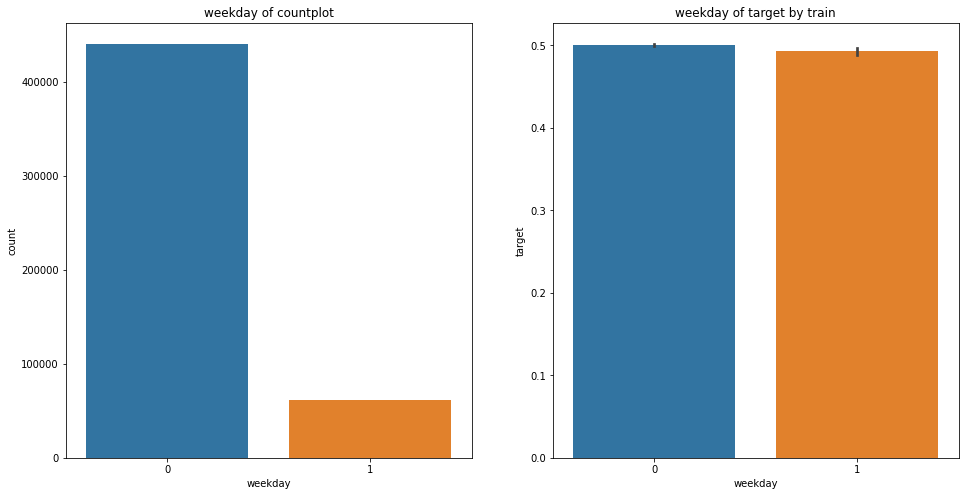

In [31]:
# 평일과 주말을 target과 비교해보자.
fig, ax = plt.subplots(ncols = 2,figsize = (16,8))
sns.countplot(train_data['weekday'], ax = ax[0])
sns.barplot(data = train_data, x = 'weekday', y = 'target', ax = ax[1])

ax[0].set_title('weekday of countplot')
ax[1].set_title('weekday of target by train')
# 평일과 주말의 차이가 크지 않다고 생각한다.

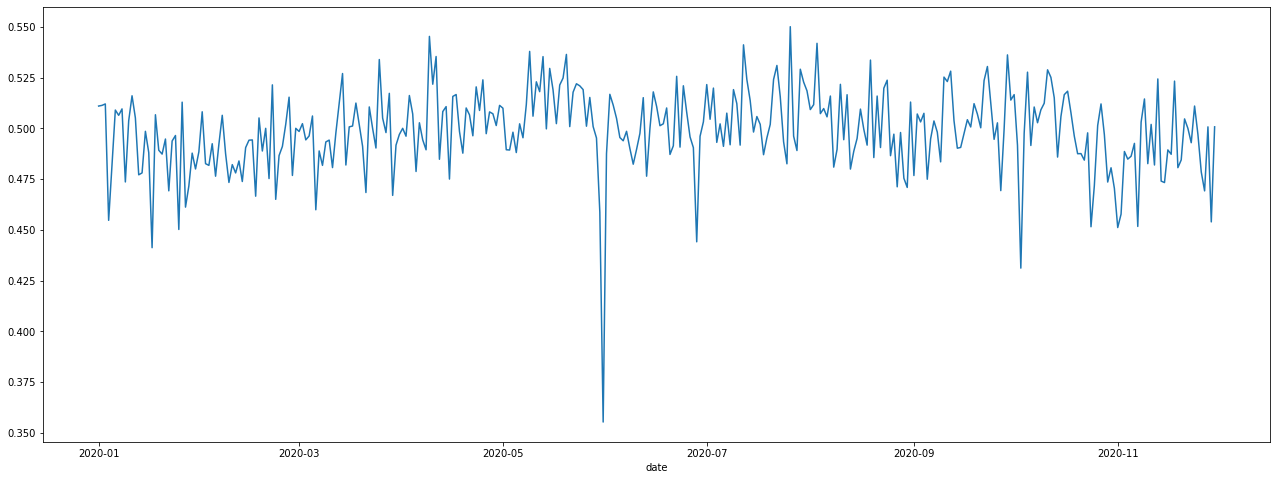

In [32]:
## date를 이용하여 점점 늘어나는지 확인해보자.
plot_data = train_data.groupby('date')['target'].mean()
plot_data
plt.figure(figsize = (22,8))
sns.lineplot(data = plot_data, x = plot_data.index, y = plot_data.values)

## 2020.05.31을 줄이니 더 좋은 성과를 낸다.

In [33]:
## 우리가 확인해봐야할 것
## 평일에 공휴일인 곳을 바꿔줘야 한다.
## 왜 저 날은 내려갔을까?
## 중복 제거를 해야할 것 같은데 그 부분도 한번 계속 확인해보자.

In [34]:
for i in plot_data.index:
    if plot_data[i] < 0.4:
        print(i)

## 왜 이 날짜만 적게 나타났을까?
# train_data[train_data['date'] == datetime.date(2020, 5, 31)]

delete_index = train_data[train_data['date'] == datetime.date(2020, 5, 31)].index

train_data = train_data.drop(delete_index, axis = 0)

train_data = train_data.reset_index(drop = True)

2020-05-31


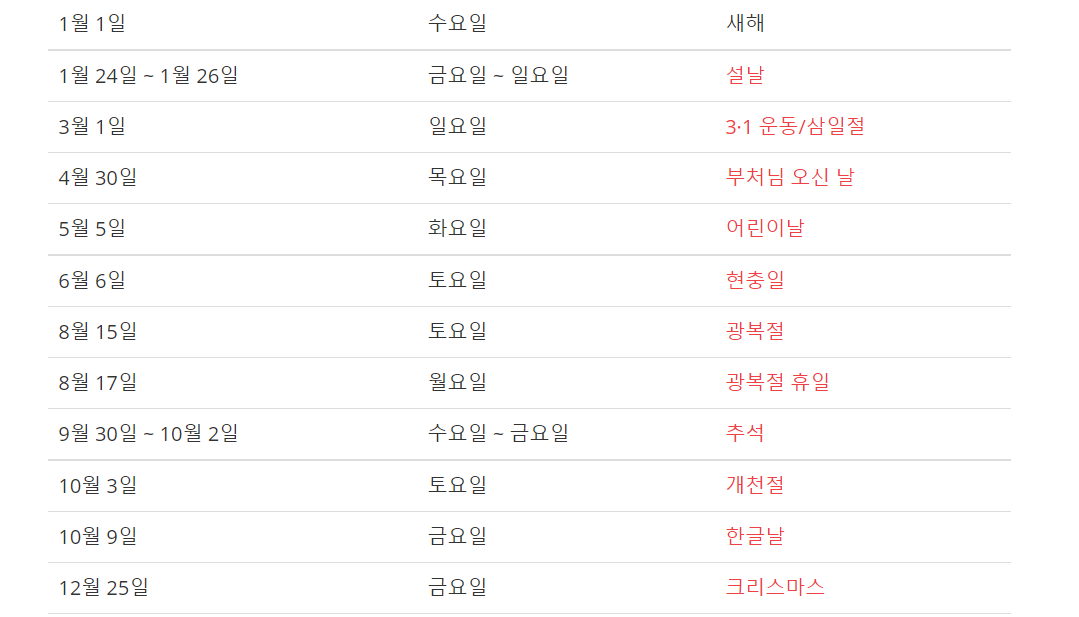

In [35]:
## 평일인데 공휴일인 부분은 주말로 변경해주자.
train_data['date'] = train_data['date'].apply(lambda x:str(x))

change_date = ['2020-01-01', '2020-01-24', '2020-04-30','2020-05-05','2020-08-17', '2020-09-30','2020-10-01','2020-10-02','2020-10-09','2020-12-25']

for i in train_data.index:
    if train_data.loc[i, 'date'] in change_date:

        train_data.loc[i,'weekday'] = 1
        train_data.loc[i,'weekend'] = 6

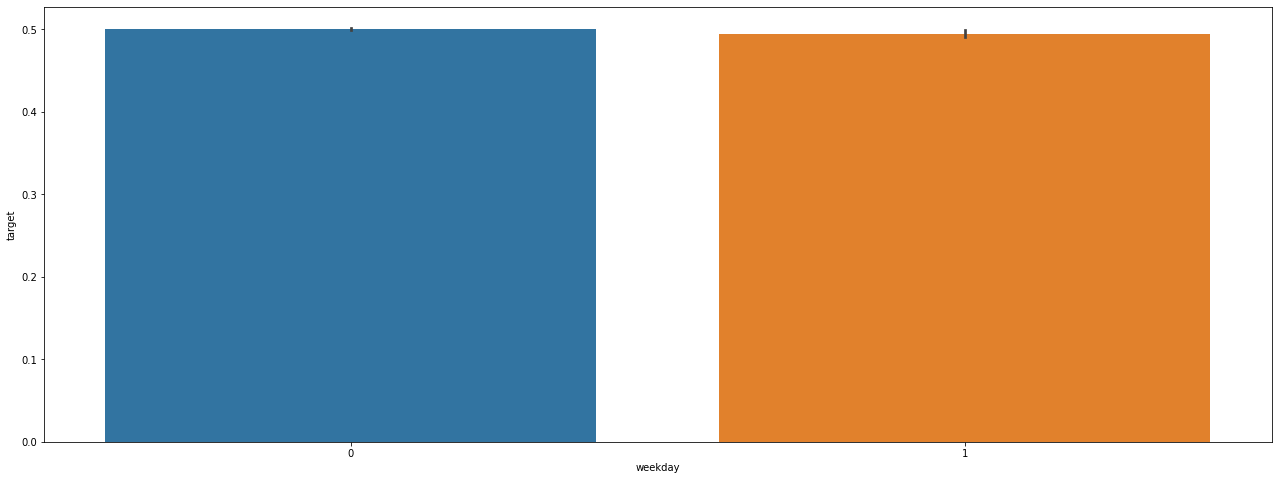

In [36]:
# ??? 영향이 없나...? ㅎㅎ
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'weekday', y = 'target')

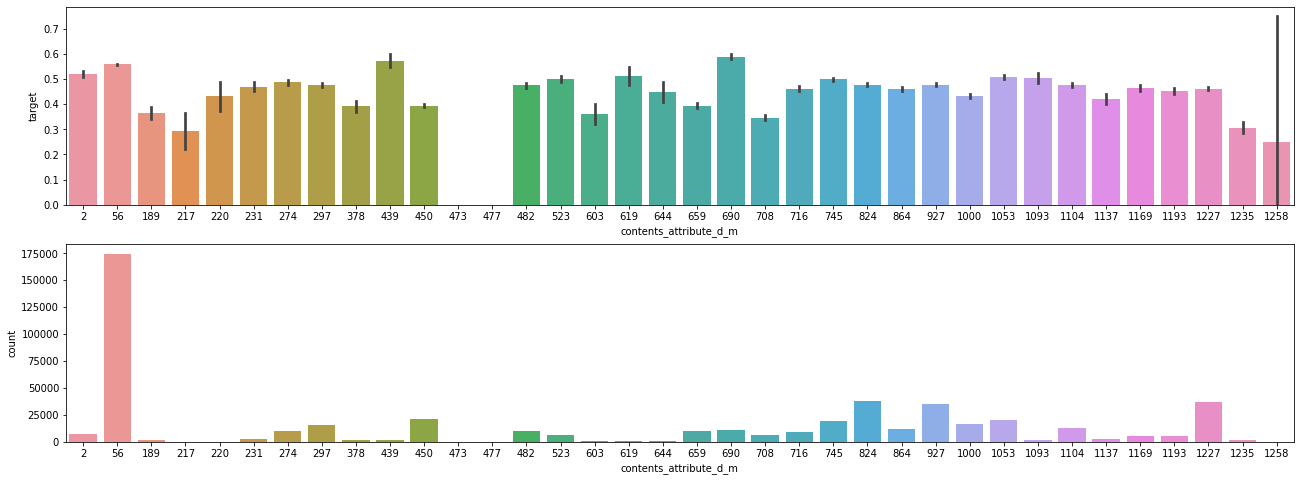

In [37]:
fig, ax = plt.subplots(nrows = 2,figsize = (22,8))
sns.barplot(data = train_data, x = 'contents_attribute_d_m', y = 'target', ax = ax[0])
sns.countplot(train_data['contents_attribute_d_m'], ax = ax[1])

### D,H,L 데이터 target 평균값으로 mapping 해주기

In [38]:
## groupby 해야하는 것 전부!!!
def D_H_L_mapping(train = None, test = None):
    
    ## D_1_code
    person_prefer_d_1_l = train.groupby('person_prefer_d_1_l')['target'].mean()
    train['person_prefer_d_1_l'] = train['person_prefer_d_1_l'].map({i:j for i, j in zip(person_prefer_d_1_l.keys(), person_prefer_d_1_l.values)})
    test['person_prefer_d_1_l'] = test['person_prefer_d_1_l'].map({i:j for i, j in zip(person_prefer_d_1_l.keys(), person_prefer_d_1_l.values)})

    person_prefer_d_1_n = train.groupby('person_prefer_d_1_n')['target'].mean()
    train['person_prefer_d_1_n'] = train['person_prefer_d_1_n'].map({i:j for i, j in zip(person_prefer_d_1_n.keys(), person_prefer_d_1_n.values)})
    test['person_prefer_d_1_n'] = test['person_prefer_d_1_n'].map({i:j for i, j in zip(person_prefer_d_1_n.keys(), person_prefer_d_1_n.values)})


    person_prefer_d_1_m = train.groupby('person_prefer_d_1_m')['target'].mean()
    train['person_prefer_d_1_m'] = train['person_prefer_d_1_m'].map({i:j for i, j in zip(person_prefer_d_1_m.keys(), person_prefer_d_1_m.values)})
    test['person_prefer_d_1_m'] = test['person_prefer_d_1_m'].map({i:j for i, j in zip(person_prefer_d_1_m.keys(), person_prefer_d_1_m.values)})
    
    person_prefer_d_1_s = train.groupby('person_prefer_d_1_s')['target'].mean()
    train['person_prefer_d_1_s'] = train['person_prefer_d_1_s'].map({i:j for i, j in zip(person_prefer_d_1_s.keys(), person_prefer_d_1_s.values)})
    test['person_prefer_d_1_s'] = test['person_prefer_d_1_s'].map({i:j for i, j in zip(person_prefer_d_1_s.keys(), person_prefer_d_1_s.values)})

    ## D_2_code
    person_prefer_d_2_l = train.groupby('person_prefer_d_2_l')['target'].mean()
    train['person_prefer_d_2_l'] = train['person_prefer_d_2_l'].map({i:j for i, j in zip(person_prefer_d_2_l.keys(), person_prefer_d_2_l.values)})
    test['person_prefer_d_2_l'] = test['person_prefer_d_2_l'].map({i:j for i, j in zip(person_prefer_d_2_l.keys(), person_prefer_d_2_l.values)})

    person_prefer_d_2_n = train.groupby('person_prefer_d_2_n')['target'].mean()
    train['person_prefer_d_2_n'] = train['person_prefer_d_2_n'].map({i:j for i, j in zip(person_prefer_d_2_n.keys(), person_prefer_d_2_n.values)})
    test['person_prefer_d_2_n'] = test['person_prefer_d_2_n'].map({i:j for i, j in zip(person_prefer_d_2_n.keys(), person_prefer_d_2_n.values)})
    
    person_prefer_d_2_m = train.groupby('person_prefer_d_2_m')['target'].mean()
    train['person_prefer_d_2_m'] = train['person_prefer_d_2_m'].map({i:j for i, j in zip(person_prefer_d_2_m.keys(), person_prefer_d_2_m.values)})
    test['person_prefer_d_2_m'] = test['person_prefer_d_2_m'].map({i:j for i, j in zip(person_prefer_d_2_m.keys(), person_prefer_d_2_m.values)})

    person_prefer_d_2_s = train.groupby('person_prefer_d_2_s')['target'].mean()
    train['person_prefer_d_2_s'] = train['person_prefer_d_2_s'].map({i:j for i, j in zip(person_prefer_d_2_s.keys(), person_prefer_d_2_s.values)})
    test['person_prefer_d_2_s'] = test['person_prefer_d_2_s'].map({i:j for i, j in zip(person_prefer_d_2_s.keys(), person_prefer_d_2_s.values)})

    ## D_3_code
    person_prefer_d_3_l = train.groupby('person_prefer_d_3_l')['target'].mean()
    train['person_prefer_d_3_l'] = train['person_prefer_d_3_l'].map({i:j for i, j in zip(person_prefer_d_3_l.keys(), person_prefer_d_3_l.values)})
    test['person_prefer_d_3_l'] = test['person_prefer_d_3_l'].map({i:j for i, j in zip(person_prefer_d_3_l.keys(), person_prefer_d_3_l.values)})

    person_prefer_d_3_n = train.groupby('person_prefer_d_3_n')['target'].mean()
    train['person_prefer_d_3_n'] = train['person_prefer_d_3_n'].map({i:j for i, j in zip(person_prefer_d_3_n.keys(), person_prefer_d_3_n.values)})
    test['person_prefer_d_3_n'] = test['person_prefer_d_3_n'].map({i:j for i, j in zip(person_prefer_d_3_n.keys(), person_prefer_d_3_n.values)})
    
    person_prefer_d_3_m = train.groupby('person_prefer_d_3_m')['target'].mean()
    train['person_prefer_d_3_m'] = train['person_prefer_d_3_m'].map({i:j for i, j in zip(person_prefer_d_3_m.keys(), person_prefer_d_3_m.values)})
    test['person_prefer_d_3_m'] = test['person_prefer_d_3_m'].map({i:j for i, j in zip(person_prefer_d_3_m.keys(), person_prefer_d_3_m.values)})

    person_prefer_d_3_s = train.groupby('person_prefer_d_3_s')['target'].mean()
    train['person_prefer_d_3_s'] = train['person_prefer_d_3_s'].map({i:j for i, j in zip(person_prefer_d_3_s.keys(), person_prefer_d_3_s.values)})
    test['person_prefer_d_3_s'] = test['person_prefer_d_3_s'].map({i:j for i, j in zip(person_prefer_d_3_s.keys(), person_prefer_d_3_s.values)})
    
    ## contents_d
    contents_attribute_d_l = train.groupby('contents_attribute_d_l')['target'].mean()
    train['contents_attribute_d_l'] = train['contents_attribute_d_l'].map({i:j for i, j in zip(contents_attribute_d_l.keys(), contents_attribute_d_l.values)})
    test['contents_attribute_d_l'] = test['contents_attribute_d_l'].map({i:j for i, j in zip(contents_attribute_d_l.keys(), contents_attribute_d_l.values)})

    contents_attribute_d_m = train.groupby('contents_attribute_d_m')['target'].mean()
    train['contents_attribute_d_m'] = train['contents_attribute_d_m'].map({i:j for i, j in zip(contents_attribute_d_m.keys(), contents_attribute_d_m.values)})
    test['contents_attribute_d_m'] = test['contents_attribute_d_m'].map({i:j for i, j in zip(contents_attribute_d_m.keys(), contents_attribute_d_m.values)})

    contents_attribute_d_n = train.groupby('contents_attribute_d_n')['target'].mean()
    train['contents_attribute_d_n'] = train['contents_attribute_d_n'].map({i:j for i, j in zip(contents_attribute_d_n.keys(), contents_attribute_d_n.values)})
    test['contents_attribute_d_n'] = test['contents_attribute_d_n'].map({i:j for i, j in zip(contents_attribute_d_n.keys(), contents_attribute_d_n.values)})

    contents_attribute_d_s = train.groupby('contents_attribute_d_s')['target'].mean()
    train['contents_attribute_d_s'] = train['contents_attribute_d_s'].map({i:j for i, j in zip(contents_attribute_d_s.keys(), contents_attribute_d_s.values)})
    test['contents_attribute_d_s'] = test['contents_attribute_d_s'].map({i:j for i, j in zip(contents_attribute_d_s.keys(), contents_attribute_d_s.values)})

    ## H_1_code
    person_prefer_h_1_l = train.groupby('person_prefer_h_1_l')['target'].mean()
    train['person_prefer_h_1_l'] = train['person_prefer_h_1_l'].map({i:j for i, j in zip(person_prefer_h_1_l.keys(), person_prefer_h_1_l.values)})
    test['person_prefer_h_1_l'] = test['person_prefer_h_1_l'].map({i:j for i, j in zip(person_prefer_h_1_l.keys(), person_prefer_h_1_l.values)})
    
    person_prefer_h_1_m = train.groupby('person_prefer_h_1_m')['target'].mean()
    train['person_prefer_h_1_m'] = train['person_prefer_h_1_m'].map({i:j for i, j in zip(person_prefer_h_1_m.keys(), person_prefer_h_1_m.values)})
    test['person_prefer_h_1_m'] = test['person_prefer_h_1_m'].map({i:j for i, j in zip(person_prefer_h_1_m.keys(), person_prefer_h_1_m.values)})

    ## H_2_code
    person_prefer_h_2_l = train.groupby('person_prefer_h_2_l')['target'].mean()
    train['person_prefer_h_2_l'] = train['person_prefer_h_2_l'].map({i:j for i, j in zip(person_prefer_h_2_l.keys(), person_prefer_h_2_l.values)})
    test['person_prefer_h_2_l'] = test['person_prefer_h_2_l'].map({i:j for i, j in zip(person_prefer_h_2_l.keys(), person_prefer_h_2_l.values)})

    person_prefer_h_2_m = train.groupby('person_prefer_h_2_m')['target'].mean()
    train['person_prefer_h_2_m'] = train['person_prefer_h_2_m'].map({i:j for i, j in zip(person_prefer_h_2_m.keys(), person_prefer_h_2_m.values)})
    test['person_prefer_h_2_m'] = test['person_prefer_h_2_m'].map({i:j for i, j in zip(person_prefer_h_2_m.keys(), person_prefer_h_2_m.values)})

    ## H_3_code
    person_prefer_h_3_l = train.groupby('person_prefer_h_3_l')['target'].mean()
    train['person_prefer_h_3_l'] = train['person_prefer_h_3_l'].map({i:j for i, j in zip(person_prefer_h_3_l.keys(), person_prefer_h_3_l.values)})
    test['person_prefer_h_3_l'] = test['person_prefer_h_3_l'].map({i:j for i, j in zip(person_prefer_h_3_l.keys(), person_prefer_h_3_l.values)})

    person_prefer_h_3_m = train.groupby('person_prefer_h_3_m')['target'].mean()
    train['person_prefer_h_3_m'] = train['person_prefer_h_3_m'].map({i:j for i, j in zip(person_prefer_h_3_m.keys(), person_prefer_h_3_m.values)})
    test['person_prefer_h_3_m'] = test['person_prefer_h_3_m'].map({i:j for i, j in zip(person_prefer_h_3_m.keys(), person_prefer_h_3_m.values)})

    ## contents_H
    contents_attribute_h_l = train.groupby('contents_attribute_h_l')['target'].mean()
    train['contents_attribute_h_l'] = train['contents_attribute_h_l'].map({i:j for i, j in zip(contents_attribute_h_l.keys(), contents_attribute_h_l.values)})
    test['contents_attribute_h_l'] = test['contents_attribute_h_l'].map({i:j for i, j in zip(contents_attribute_h_l.keys(), contents_attribute_h_l.values)})

    contents_attribute_h_m = train.groupby('contents_attribute_h_m')['target'].mean()
    train['contents_attribute_h_m'] = train['contents_attribute_h_m'].map({i:j for i, j in zip(contents_attribute_h_m.keys(), contents_attribute_h_m.values)})
    test['contents_attribute_h_m'] = test['contents_attribute_h_m'].map({i:j for i, j in zip(contents_attribute_h_m.keys(), contents_attribute_h_m.values)})

    ## L_code
    contents_attribute_l_n = train.groupby('contents_attribute_l_n')['target'].mean()
    train['contents_attribute_l_n'] = train['contents_attribute_l_n'].map({i:j for i, j in zip(contents_attribute_l_n.keys(), contents_attribute_l_n.values)})
    test['contents_attribute_l_n'] = test['contents_attribute_l_n'].map({i:j for i, j in zip(contents_attribute_l_n.keys(), contents_attribute_l_n.values)})
    
    contents_attribute_l_s = train.groupby('contents_attribute_l_s')['target'].mean()
    train['contents_attribute_l_s'] = train['contents_attribute_l_s'].map({i:j for i, j in zip(contents_attribute_l_s.keys(), contents_attribute_l_s.values)})
    test['contents_attribute_l_s'] = test['contents_attribute_l_s'].map({i:j for i, j in zip(contents_attribute_l_s.keys(), contents_attribute_l_s.values)})

    contents_attribute_l_m = train.groupby('contents_attribute_l_m')['target'].mean()
    train['contents_attribute_l_m'] = train['contents_attribute_l_m'].map({i:j for i, j in zip(contents_attribute_l_m.keys(), contents_attribute_l_m.values)})
    test['contents_attribute_l_m'] = test['contents_attribute_l_m'].map({i:j for i, j in zip(contents_attribute_l_m.keys(), contents_attribute_l_m.values)})

    contents_attribute_l_l = train.groupby('contents_attribute_l_l')['target'].mean()
    train['contents_attribute_l_l'] = train['contents_attribute_l_l'].map({i:j for i, j in zip(contents_attribute_l_l.keys(), contents_attribute_l_l.values)})
    test['contents_attribute_l_l'] = test['contents_attribute_l_l'].map({i:j for i, j in zip(contents_attribute_l_l.keys(), contents_attribute_l_l.values)})

    return train, test

In [39]:
train_data, test_data = D_H_L_mapping(train = train_data, test = test_data)

### True False 되어있는 부분 대분류만 처리해주기

In [40]:
## 이 방법을 사용하려고 했지만 데이터를 살펴본 결과 시작 데이터부터 이상이 생겨서 안하도록 하자.
# from tqdm import tqdm
# def True_False_change(data = None, columns = None, match = None):
#     for i in tqdm(data.index):
#         if data.loc[i,match] == False:
#             for j in columns:
#                 data.loc[i,j] = 99999
#     return data

# # 이 부분은 나중에 한번 더 추가하여 모델 돌려보기~
# train_data = True_False_change(data = train_data, columns = ['person_prefer_d_1_l', 'contents_attribute_d_l'], match = 'd_l_match_yn')
# train_data = True_False_change(data = train_data, columns = ['person_prefer_h_1_l', 'contents_attribute_h_l'], match = 'h_l_match_yn')


# test_data = True_False_change(data = test_data, columns = ['person_prefer_d_1_l', 'contents_attribute_d_l'], match = 'd_l_match_yn')
# test_data = True_False_change(data = test_data, columns = ['person_prefer_h_1_l', 'contents_attribute_h_l'], match = 'h_l_match_yn')

### E데이터 살펴보기

In [41]:
## 아무 연관이 없다.
# for i in train_data['person_prefer_e'].unique():
#     plt.figure(figsize = (22,8))
#     sns.barplot(data = train_data[train_data['person_prefer_e'] == i], x = 'contents_attribute_e', y = 'target')
#     plt.title(f'person_prefer_e : {i}')
#     plt.show()

## Modeling

In [42]:
## 1. weekend에서 train과 test에 차이가 있다고 판단함 -->> weekend를 변수로 추가해보자.
## 2. hour의 차이가 없다면? -->  제거해보고 모델 확인해 보기

In [43]:
train_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_d',
       'contents_attribute_m', 'contents_attribute_e', 'contents_attribute_h',
       'person_rn', 'contents_rn', 'contents_open_dt', 'target',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l',
       'contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d

In [44]:
## Github에 보면 person_attribute_a와 person_attribute_a_1의 값을 비교해 봤을 때 두 개의 변수가 다 필요하다고 생각된다.
## 변수를 추출하며 확인해 보자.
dummy_column = ['person_attribute_a_1', 'person_attribute_b','person_prefer_c','person_prefer_e','contents_attribute_j_1','contents_attribute_c','contents_attribute_m','contents_attribute_e']
drop_column = ['id','person_rn','contents_rn','contents_open_dt','year','month','day','weekday','hour','date','contents_attribute_j','person_prefer_f','person_prefer_g','d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn','contents_attribute_d','contents_attribute_h']

final_train = train_data.drop(drop_column, axis = 1)
final_test = test_data.drop(drop_column, axis = 1)

############### 만약에 중분류를 사용한다면? ##########################
# print(final_train.shape, final_test.shape)
# final_concat = pd.concat([final_train, final_test], axis = 0)
# final_data = pd.get_dummies(data = final_concat, columns = dummy_column)

# final_train = final_data.iloc[:501951,:]
# final_test = final_data.iloc[501951:,:].drop('target', axis = 1)

# print(final_train.shape, final_test.shape)
######################################################################

# # # train에만 존재하는 변수가 있기 때문에
final_train = pd.get_dummies(data = final_train, columns = dummy_column, drop_first = True)
final_test = pd.get_dummies(data = final_test, columns = dummy_column, drop_first = True)

In [45]:
print('train_data shape :', final_train.shape)
print('test_data shape :', final_test.shape)

train_data shape : (501374, 87)
test_data shape : (46404, 86)


In [46]:
for i in set(final_train.columns):
    if i in final_test.columns:
        pass
    else:
        print(i)

target


In [47]:
final_train.columns

Index(['person_attribute_a', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_k', 'target', 'person_prefer_d_1_n',
       'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m',
       'person_prefer_d_2_l', 'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'contents_attribute_l_n',
       'contents_attribute_l_s', 'contents_attribute_l_m',
       'contents_attribute_l_l', 'weekend', 'person_attribute_a_1_1',
       'person_attribute_a_1_2', 'person_attribute_a_1_3',
       'person_attribute_a_1_4', 'p

In [48]:
# # 중요 변수를 추출하기 위해서 statsmodels로 변수들의 P-value를 확인한다.
import statsmodels.api as sm

X = sm.add_constant(final_train.drop('target', axis = 1))
y = final_train['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     303.6
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:42:53   Log-Likelihood:            -3.5116e+05
No. Observations:              501374   AIC:                         7.025e+05
Df Residuals:                  501287   BIC:                         7.035e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [49]:
## 나중에 P-value를 통해서 변수 제거를 시도해 보자.
X = sm.add_constant(final_train.drop('target', axis = 1))
model = sm.Logit(final_train['target'], X)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.667166
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               501374
Model:                          Logit   Df Residuals:                   501287
Method:                           MLE   Df Model:                           86
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                 0.03748
Time:                        13:42:57   Log-Likelihood:            -3.3450e+05
converged:                       True   LL-Null:                   -3.4753e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.8635      0.360    -16.310      0.000      -6.

In [50]:
final_test.columns

Index(['person_attribute_a', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_k', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'contents_attribute_l_n',
       'contents_attribute_l_s', 'contents_attribute_l_m',
       'contents_attribute_l_l', 'weekend', 'person_attribute_a_1_1',
       'person_attribute_a_1_2', 'person_attribute_a_1_3',
       'person_attribute_a_1_4', 'person_attr

In [51]:
!pip install catboost
!pip install vecstack

     |████████████████████████████████| 76.1 MB 4.3 MB/s 
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=e96ca2d5e9b93ae55aef3a7c206832ea677147ae05cb39d200fd6f25c3b9c941
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [52]:
print(final_train.shape, final_test.shape)

(501374, 87) (46404, 86)


In [53]:
print(final_train.isnull().sum().sum(), final_test.isnull().sum().sum())

0 12


In [54]:
## train에는 없지만 test데이터에 있는 변수는 아예 발견할 수 없는 변수이기 때문에 0.5로 변경한다.
## 그러나 threshold가 0.4 이기 때문에 나중에 변경하도록 한다.
for columns, null_value in zip(final_test.isnull().sum().keys(), final_test.isnull().sum().values):

    if null_value > 0:

        final_test[columns] = final_test[columns].fillna(final_train[columns].mean())
        
        print(columns)
        print('Done')

print(final_test.isnull().sum().sum())

person_prefer_d_2_n
Done
person_prefer_d_3_n
Done
contents_attribute_d_n
Done
contents_attribute_l_n
Done
0


### stacking

In [55]:
# ## 추가적으로 진행할 내용
# # huber regression
# # extra regression

# ## Stacking을 사용해보자
# from lightgbm import LGBMRegressor, LGBMClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier
# from xgboost import XGBRegressor, XGBClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingRegressor
# from vecstack import stacking
# from tqdm import tqdm
# from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, LinearRegression, HuberRegressor
# from sklearn.metrics import f1_score, mean_squared_error

# def rmse(y, y_pred):
#     return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

# def f1_score_predict(y, y_pred):
#     return f1_score(y, y_pred, pos_label = 1)

# ## regression으로 문제를 푼다면?
# lgb = LGBMRegressor(random_state = 42)
# xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
# cat = CatBoostRegressor(random_state = 42, task_type = 'GPU', verbose = False)
# rfg = RandomForestRegressor(random_state = 42)
# ridge = Ridge(random_state = 42)
# gb = GradientBoostingRegressor(random_state = 42)
# hb = HuberRegressor()

# meta_model = LogisticRegression()
# models = [lgb, xgb, cat, rfg, ridge,gb, hb]

# # # # ## classifier로 문제를 푼다면
# # # lgb = LGBMClassifier(random_state= 42)
# # # xgb = XGBClassifier(random_state= 42, tree_method = 'gpu_hist')
# # # cat = CatBoostClassifier(random_state = 42,task_type = 'GPU', eval_metric= "F1")
# # # rfg = RandomForestClassifier(random_state = 42)
# # # ridge = RidgeClassifier(random_state = 42)
# # # models = [lgb, xgb, cat, rfg, ridge]
# # # lr = LogisticRegression()

# S_train, S_test = stacking(models, final_train.drop('target', axis = 1), final_train['target'], final_test, regression = True, mode = 'oof_pred_bag', metric = rmse, n_folds = 3, stratified=True, shuffle = True)


# meta_model.fit(S_train, final_train['target'])
# prediction = pd.Series(i[1] for i in meta_model.predict_proba(S_test)).apply(lambda x:1 if x>0.35 else 0)

# # # print(prediction)

In [56]:
# a = []
# b = []
# for i in prediction:

#     if i == 0:
#         a.append(i)
#     else:
#         b.append(i)

In [57]:
# print(len(a), len(b))

In [58]:
# submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

# submission['target'] = prediction

# submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)

In [59]:
# submission

### voting(stacking에 비해서 많이 부족하다)

In [60]:
# from sklearn.ensemble import VotingRegressor
# from lightgbm import LGBMRegressor, LGBMClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier
# from xgboost import XGBRegressor, XGBClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
# from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, LinearRegression

# def rmse(y, y_pred):
#   return np.sqrt(mean_squared_error(y, y_pred))

# lr = LinearRegression()
# lgb = LGBMRegressor(random_state = 42)
# cat = CatBoostRegressor(random_state = 42,verbose = False, task_type = 'GPU')
# xgb = XGBRegressor(random_state = 42,tree_method = 'gpu_hist')
# rfg = RandomForestRegressor(random_state = 42)
# gb = GradientBoostingRegressor(random_state = 42)


# vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('rfg',rfg),('gb',gb)])
# vo_reg.fit(final_train.drop('target', axis = 1), final_train['target'])
# prediction = vo_reg.predict(final_test)
# prediction = np.where(prediction >= 0.4, 1, 0)

In [61]:
# a = []
# b = []
# for i in prediction:

#     if i == 0:
#         a.append(i)
#     else:
#         b.append(i)

In [62]:
# print(len(a), len(b))

In [63]:
# submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

# submission['target'] = prediction

# submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)

### 생각하는 방법으로 모델 작성해보기

In [64]:
# from lightgbm import LGBMRegressor, LGBMClassifier
# from catboost import CatBoostRegressor, CatBoostClassifier
# from xgboost import XGBRegressor, XGBClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
# # from vecstack import stacking
# from tqdm import tqdm
# from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier, LinearRegression
# from sklearn.metrics import f1_score
# from sklearn.model_selection import KFold, train_test_split

# def f1_score_predict(y, y_pred):
#     return f1_score(y, y_pred, pos_label = 1)

# # # lgb = LGBMClassifier(random_state= 42)
# # # xgb = XGBClassifier(random_state= 42, tree_method = 'gpu_hist')
# # # cat = CatBoostClassifier(random_state = 42,task_type = 'GPU', eval_metric= "F1")
# # # rfg = RandomForestClassifier(random_state = 42)
# # # ridge = RidgeClassifier(random_state = 42)

# models=[XGBClassifier(random_state= 42,tree_method = 'gpu_hist'),LGBMClassifier(random_state= 42),
#         RandomForestClassifier(random_state= 42),CatBoostClassifier(random_state= 42,task_type = 'GPU', eval_metric= "F1",verbose = False), GradientBoostingClassifier(random_state= 42)]
# final_model = LogisticRegression()
# def stacking_ensemble(models, train_data = None, test_data = None ,target = None, test_size = 0.2,
#                       n_folds = 5, final_model = final_model):
#     # kfold를 사용한다.
#     kfold = KFold(n_splits = n_folds)
    
#     # 데이터를 train데이터와 test 데이터로 나누어준다.
#     X_train, X_test, y_train = train_data.drop('target', axis = 1), test_data, train_data['target']

#     # 각 모델의 평균값을 넣어주기 위해서 공간을 만든다.
#     final_train_predict = np.zeros((X_train.shape[0], len(models)))
#     final_test_predict = np.zeros((X_test.shape[0], len(models)))
    
#     for model_count, model in tqdm(enumerate(models)):
        
#         # 각 모델마다 k_fold의 값들을 넣어주기 위해서 공간을 만든다.
#         test_predict = np.zeros((X_test.shape[0], n_folds))
        
#         # X_train의 데이터를 train과 valid로 나누기 
#         for fold_count, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
#             X_train_n = X_train.iloc[train_idx]
#             y_train_n = y_train.iloc[train_idx]
#             X_test_n = X_train.iloc[valid_idx]

#             # 개별 모델을 학습한다.
#             model = model.fit(X_train_n, y_train_n)
#             final_train_predict[valid_idx, model_count] = pd.Series([i[0] for i in model.predict_proba(X_test_n)])
#             test_predict[:, fold_count] = pd.Series(i[1] for i in model.predict_proba(X_test))
            
#         # 교차검증을 한 데이터를 가지고 평균 구하기    
#         final_test_predict[:,model_count] = np.mean(test_predict, axis = 1)
                
#     # 최종 모델로 학습시키기
#     final_model = final_model.fit(final_train_predict, y_train)
#     y_pred = pd.Series(i[1] for i in final_model.predict_proba(final_test_predict)).apply(lambda x:1 if x >= 0.4 else 0)

#     return y_pred

In [65]:
# y_pred = stacking_ensemble(models = models, train_data = final_train, test_data = final_test ,target = final_train['target'], final_model = final_model)

In [66]:
# a = []
# b = []
# for i in y_pred:

#     if i == 0:
#         a.append(i)
#     else:
#         b.append(i)

In [67]:
# print(len(a), len(b))

In [68]:
# y_pred

In [69]:
# submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

# submission['target'] = y_pred

# submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)

### TabNet

참고자료

- https://wsshin.tistory.com/5
- http://dmqm.korea.ac.kr/activity/seminar/327

In [70]:
!pip install pytorch-tabnet==3.1.1

In [71]:
## TabNet을 위해 필요한 모듈
import torch

from torch import nn
from pytorch_tabnet.tab_model  import TabNetClassifier 
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

In [78]:
class F1_Score(Metric):
    def __init__(self):
        self._name = "f1"
        self._maximize = True

    def __call__(self, y_true, y_score):
        score = f1_score(y_true, (y_score[:, 1]>0.5)*1)
        return score

In [90]:
kfold = StratifiedKFold(n_splits = 5)

# gpu를 사용하기 위해서
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

print('GPU를 사용하는가? :', DEVICE)

models = []

n_iter = 0

# final_train과 final_test를 전부 numpy형태로 변경
train_data = final_train.drop('target', axis = 1).values
train_target = final_train['target'].values
test_data = final_test.values

# KFold를 진행하여 TabNet을 실행하기!
for train_index, val_index in tqdm(kfold.split(train_data, train_target)):
    n_iter += 1

    X_train, X_test = train_data[train_index], train_data[val_index] 
    y_train, y_test = train_target[train_index], train_target[val_index]
    
    train_set = (X_train, y_train)
    eval_set = (X_test, y_test)

    model = TabNetClassifier(seed = 42)
    model.fit(X_train = X_train, y_train = y_train, eval_set = [train_set,eval_set], eval_name = ['train','val'], eval_metric = ['logloss', 'f1'], max_epochs = 50, batch_size = 256)

    models.append(model) 

GPU를 사용하는가? : cuda


0it [00:00, ?it/s]

Device used : cuda
epoch 0  | loss: 0.68407 | train_logloss: 0.67648 | train_f1: 0.57049 | val_logloss: 0.6723  | val_f1: 0.56908 |  0:00:54s
epoch 1  | loss: 0.67357 | train_logloss: 0.66924 | train_f1: 0.58657 | val_logloss: 0.6642  | val_f1: 0.5837  |  0:01:49s
epoch 2  | loss: 0.67092 | train_logloss: 0.67317 | train_f1: 0.52426 | val_logloss: 0.66813 | val_f1: 0.53349 |  0:02:43s
epoch 3  | loss: 0.66744 | train_logloss: 0.66395 | train_f1: 0.60736 | val_logloss: 0.658   | val_f1: 0.60813 |  0:03:38s
epoch 4  | loss: 0.66465 | train_logloss: 0.66164 | train_f1: 0.60902 | val_logloss: 0.65702 | val_f1: 0.60497 |  0:04:32s
epoch 5  | loss: 0.66305 | train_logloss: 0.65921 | train_f1: 0.61009 | val_logloss: 0.65441 | val_f1: 0.60706 |  0:05:26s
epoch 6  | loss: 0.66254 | train_logloss: 0.66203 | train_f1: 0.64701 | val_logloss: 0.65755 | val_f1: 0.64453 |  0:06:20s
epoch 7  | loss: 0.66235 | train_logloss: 0.65967 | train_f1: 0.59257 | val_logloss: 0.65453 | val_f1: 0.59499 |  0:07:1

1it [26:18, 1578.97s/it]

Device used : cuda
epoch 0  | loss: 0.68322 | train_logloss: 0.67489 | train_f1: 0.57377 | val_logloss: 0.66834 | val_f1: 0.58478 |  0:00:58s
epoch 1  | loss: 0.67182 | train_logloss: 0.67662 | train_f1: 0.55435 | val_logloss: 0.67322 | val_f1: 0.55837 |  0:01:59s
epoch 2  | loss: 0.66902 | train_logloss: 0.66888 | train_f1: 0.6136  | val_logloss: 0.66296 | val_f1: 0.62238 |  0:02:58s
epoch 3  | loss: 0.66843 | train_logloss: 0.66703 | train_f1: 0.64849 | val_logloss: 0.6632  | val_f1: 0.65325 |  0:03:55s
epoch 4  | loss: 0.6647  | train_logloss: 0.66328 | train_f1: 0.62804 | val_logloss: 0.65945 | val_f1: 0.63318 |  0:04:53s
epoch 5  | loss: 0.6636  | train_logloss: 0.66187 | train_f1: 0.60218 | val_logloss: 0.65768 | val_f1: 0.60864 |  0:05:51s
epoch 6  | loss: 0.66272 | train_logloss: 0.66302 | train_f1: 0.61428 | val_logloss: 0.65864 | val_f1: 0.6206  |  0:06:49s
epoch 7  | loss: 0.66196 | train_logloss: 0.65951 | train_f1: 0.6499  | val_logloss: 0.65706 | val_f1: 0.65159 |  0:07:4

2it [46:47, 1372.64s/it]

Device used : cuda
epoch 0  | loss: 0.68648 | train_logloss: 0.68183 | train_f1: 0.50856 | val_logloss: 0.67323 | val_f1: 0.54383 |  0:00:57s
epoch 1  | loss: 0.68219 | train_logloss: 0.68271 | train_f1: 0.49998 | val_logloss: 0.67163 | val_f1: 0.55496 |  0:01:55s
epoch 2  | loss: 0.68105 | train_logloss: 0.68079 | train_f1: 0.56192 | val_logloss: 0.66814 | val_f1: 0.6051  |  0:02:51s
epoch 3  | loss: 0.67847 | train_logloss: 0.67584 | train_f1: 0.55785 | val_logloss: 0.66611 | val_f1: 0.594   |  0:03:47s
epoch 4  | loss: 0.67383 | train_logloss: 0.67044 | train_f1: 0.59964 | val_logloss: 0.65987 | val_f1: 0.62687 |  0:04:44s
epoch 5  | loss: 0.66992 | train_logloss: 0.66603 | train_f1: 0.61223 | val_logloss: 0.65821 | val_f1: 0.63314 |  0:05:40s
epoch 6  | loss: 0.6683  | train_logloss: 0.66578 | train_f1: 0.61329 | val_logloss: 0.65802 | val_f1: 0.63312 |  0:06:37s
epoch 7  | loss: 0.66695 | train_logloss: 0.66397 | train_f1: 0.59582 | val_logloss: 0.65696 | val_f1: 0.61511 |  0:07:3

3it [1:05:05, 1247.37s/it]

Device used : cuda
epoch 0  | loss: 0.68066 | train_logloss: 0.67434 | train_f1: 0.57662 | val_logloss: 0.69464 | val_f1: 0.54014 |  0:00:56s
epoch 1  | loss: 0.67111 | train_logloss: 0.67179 | train_f1: 0.50518 | val_logloss: 0.69068 | val_f1: 0.44892 |  0:01:51s
epoch 2  | loss: 0.6685  | train_logloss: 0.66526 | train_f1: 0.59189 | val_logloss: 0.68786 | val_f1: 0.5428  |  0:02:48s
epoch 3  | loss: 0.66497 | train_logloss: 0.66406 | train_f1: 0.61049 | val_logloss: 0.68572 | val_f1: 0.56606 |  0:03:44s
epoch 4  | loss: 0.66351 | train_logloss: 0.661   | train_f1: 0.60282 | val_logloss: 0.69147 | val_f1: 0.55382 |  0:04:41s
epoch 5  | loss: 0.66009 | train_logloss: 0.65806 | train_f1: 0.62799 | val_logloss: 0.68021 | val_f1: 0.58114 |  0:05:38s
epoch 6  | loss: 0.65731 | train_logloss: 0.65453 | train_f1: 0.65439 | val_logloss: 0.67681 | val_f1: 0.61938 |  0:06:34s
epoch 7  | loss: 0.65538 | train_logloss: 0.65201 | train_f1: 0.63539 | val_logloss: 0.68226 | val_f1: 0.58993 |  0:07:3

4it [1:25:50, 1246.60s/it]

Device used : cuda
epoch 0  | loss: 0.68211 | train_logloss: 0.67597 | train_f1: 0.57364 | val_logloss: 0.68539 | val_f1: 0.55781 |  0:00:55s
epoch 1  | loss: 0.67343 | train_logloss: 0.66933 | train_f1: 0.55533 | val_logloss: 0.68257 | val_f1: 0.53984 |  0:01:51s
epoch 2  | loss: 0.66916 | train_logloss: 0.66612 | train_f1: 0.62845 | val_logloss: 0.6806  | val_f1: 0.61809 |  0:02:47s
epoch 3  | loss: 0.66567 | train_logloss: 0.66196 | train_f1: 0.59596 | val_logloss: 0.67887 | val_f1: 0.57871 |  0:03:43s
epoch 4  | loss: 0.66306 | train_logloss: 0.66216 | train_f1: 0.6359  | val_logloss: 0.6776  | val_f1: 0.62291 |  0:04:38s
epoch 5  | loss: 0.66283 | train_logloss: 0.65982 | train_f1: 0.61321 | val_logloss: 0.67527 | val_f1: 0.59988 |  0:05:34s
epoch 6  | loss: 0.66063 | train_logloss: 0.65982 | train_f1: 0.63622 | val_logloss: 0.67317 | val_f1: 0.62245 |  0:06:29s
epoch 7  | loss: 0.66049 | train_logloss: 0.65807 | train_f1: 0.63166 | val_logloss: 0.67198 | val_f1: 0.61807 |  0:07:2

5it [1:51:32, 1338.43s/it]


In [91]:
test_data = final_test.values

In [163]:
threshold = 0.4

pred_list = []
scores = []
for i,(tri, vai) in enumerate(kfold.split(train_data, train_target) ):
    pred = models[i].predict_proba(train_data[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(train_target[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(test_data)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

[0.5456103272976524, 0.4569405207787393, 0.556903704863402, 0.36723335078389774, 0.5337841452584501]
0.49209440979642827


In [164]:
pred = np.mean(pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

In [165]:
a = []
b = []
for i in pred:

    if i == 0:
        a.append(i)
    else:
        b.append(i)

In [166]:
print(len(a), len(b))

31258 15146


In [167]:
submission = pd.read_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv')

submission['target'] = pred

submission.to_csv('/content/drive/MyDrive/데이콘/잡케어 추천 알고리즘/Data/sample_submission.csv', index = False)